Регрессия – это зависимость среднего значения какой-либо величины от некоторой другой величины или от нескольких других величин. В отличие от чисто функциональной зависимости y=f(x), когда каждому значению независимой переменной x соответствует одно определённое значение зависимой переменной у, при регрессионной связи одному и тому же значению независимой переменной (фактору) x могут соответствовать в зависимости от конкретного случая различные значения зависимой переменной (отклика) у.

Изучение регрессии основано на том, что случайные величины Х и Y связаны между собой вероятностной зависимостью: при каждом конкретном значении X=x величина Y является случайной величиной с вполне определённым распределением вероятностей. Зависимость зависимой переменной – отклика от одной независимой переменной – фактора или нескольких факторов называется уравнением регрессии. По количеству факторов выделяют парную (однофакторную) и множественную (многофакторную) регрессию. Для парной будем рассматривать следующие методы регрессии: линейную, показательную, экспоненциальную, гиперболическую и параболическую.

Регрессионный анализ – это раздел математической статистики, изучающий регрессионную зависимость между случайными величинами по статистическим данным. Цель регрессионного анализа состоит в определении общего вида уравнения регрессии, вычислении оценок неизвестных параметров, входящих в уравнение регрессии проверке статистических гипотез о регрессионной связи.

Таким образом, регрессионный анализ – набор статистических методов исследования влияния одной или нескольких независимых переменных X1,…,Xn на зависимую переменную Y. Независимые переменные иначе называют регрессорами или предикторами, а зависимые переменные – критериальными переменными.

## Линейная регрессия
Линейная регрессия (Linear regression) – модель зависимости переменной x от одной или нескольких других переменных (факторов, регрессоров, независимых переменных) с линейной функцией зависимости. Линейная регрессия относится к задаче определения «линии наилучшего соответствия» через набор точек данных и стала простым предшественником нелинейных методов, которые используют для обучения нейронных сетей.

Цель линейной регрессии — поиск линии, которая наилучшим образом соответствует этим точкам. Напомним, что общее уравнение для прямой есть 
f (x) = b +mx, где m – наклон линии, а b – его сдвиг.

## Функция потерь — метод наименьших квадратов
Функция потерь – это мера количества ошибок, которые наша линейная регрессия делает на наборе данных. Хотя есть разные функции потерь, все они вычисляют расстояние между предсказанным значением y(х) и его фактическим значением.
Одна очень распространенная функция потерь называется средней квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все значения ошибок, считаем их квадраты длин и усредняем.

## Задача экстраполяции

Допустим у нас есть много экспериментальных точек. Необходимо через них провести кривую, которая как можно ближе проходила к этим точкам. При этом необходимо минимизировать среднюю квадратичную ошибку (MSE).
Для решения данной задачи в Python есть множество библиотек. Самыми распространенными выступают:

numpy - numpy.linalg.lstsq
scipy - scipy.linalg (содержит все функции из numpy.linalg плюс часть новых функций, которых нет в numpy.linalg).

1.1.1 Пример
Проведем прямую y = mx + b  через экспериментальные точки.

In [53]:
import numpy as np 
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

A = np.vstack([x, np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [54]:
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

0.9999999999999999 -0.9499999999999997


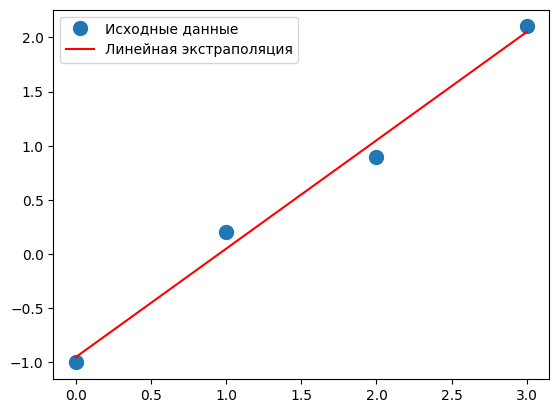

In [55]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x+c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

1.1.2 Пример

Пусть x, y – вектора длиной n > 3 (точек > 3). Задача заключается в построении экстраполяционного полинома второго порядка (параболы). Таким образом, необходимо найти такие коэффициенты полинома a, b, c по методу наименьших квадратов. Данные могут быть получены в результате измерений. Покажем пример генерации данных случайным образом и загрузки их из файла.

In [56]:
from numpy import *
from numpy.random import *
#генерируем случайные x и y
delta = 1.0

x = linspace(-5,5,11)
y = x**2+delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)

#записываем данные в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

#считываем данные из файла
x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print(x)
print(y)

[-4.74447778 -3.57838603 -3.19606961 -2.49811822 -0.92963548  0.13938459
  1.47956605  2.18967928  3.42430596  3.70333134  5.05359958]
[25.29638917 16.21848707  8.54985098  3.92624822  1.11122801 -0.48714142
  1.24370069  3.59548832  8.97276767 15.63348379 24.77141283]


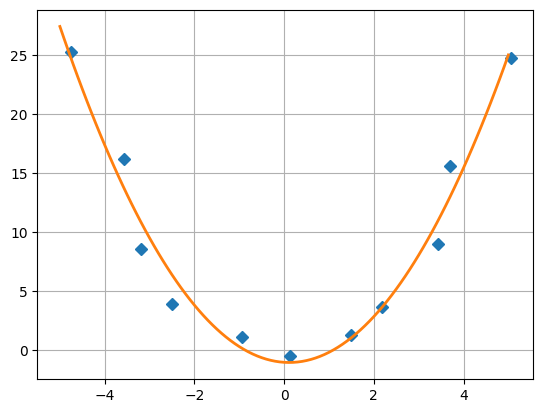

In [57]:
# Нахождение коэффициентов функции вида y = ax^2 + bx + c методом наименьших квадратов
# Задаем вектор m = [x**2, x, E]
m = vstack([x**2, x, ones(len(x))]).T
# Находим коэффициенты a, b, c
s = np.linalg.lstsq(m, y, rcond = None)[0]

# На отрезке [-5, 5] 
x_prec = linspace(-5, 5, 101)
# Рисуем точки
plt.plot(x, y, 'D')
# Рисуем кривую вида y = ax^2 + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0]*x_prec**2 + s[1]*x_prec + s[2], '-', lw=2)
plt.grid()
plt.show()

1.1.3 Пример

По данным предыдущего примера постройте экстраполяционного полинома третьего порядка

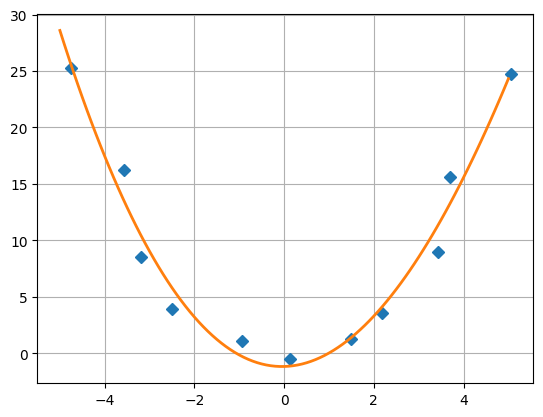

In [58]:
m = vstack((x**3, x**2, x, ones(len(x)))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-5, 5, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0]*x_prec**3 + s[1]*x_prec**2 + s[2]*x_prec + s[3], '-', lw=2)
plt.grid()
plt.show()

Задание:

Представьте собственные данные и постройте экстраполяцию полиномами первой, второй и третьей степени.

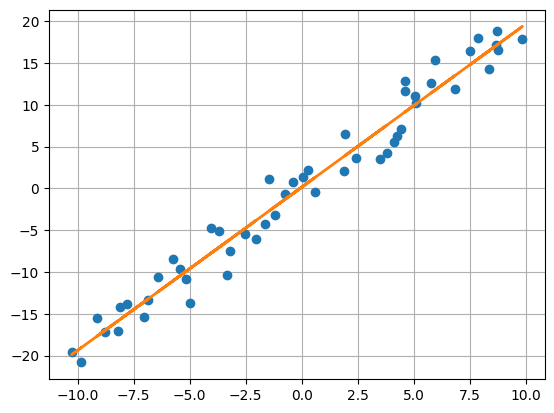

In [59]:
# y = kx + b
delta = 3.0
x = linspace(-10, 10, 50)
y = 2*x + delta*(rand(50)-0.5)
x += delta*(rand(50)-0.5)
m = vstack((x, ones(len(x)))).T
k, b = np.linalg.lstsq(m, y, rcond = None)[0]
plt.plot(x, y, 'o')
plt.plot(x, k*x + b, lw=2)
plt.grid()
plt.show()

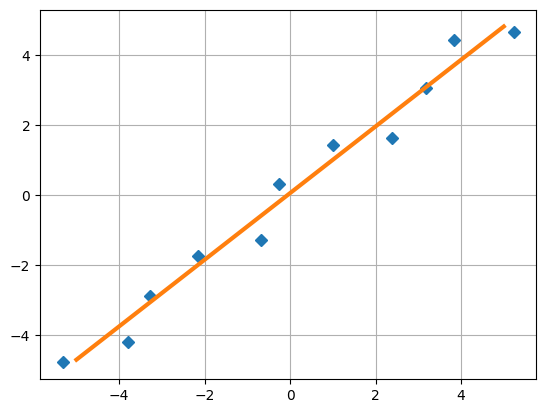

In [78]:
delta = 1.0
x = linspace(-5,5,11)
y = x+delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)
m = vstack((x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]
x_prec = linspace(-5,5,101)
plt.plot(x,y,'D')
plt.plot(x_prec, s[0] * x_prec + s[1],'-', lw = 3)
plt.grid()

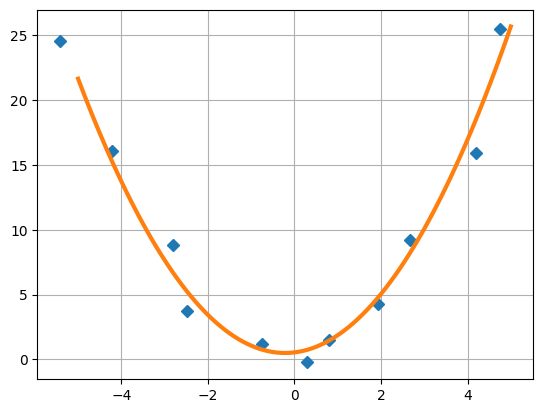

In [82]:
delta = 1.0
x = linspace(-5,5,11)
y = x**2+delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)
m = vstack((x**2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]
x_prec = linspace(-5,5,101)
plt.plot(x,y,'D')
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2],'-', lw = 3)
plt.grid()

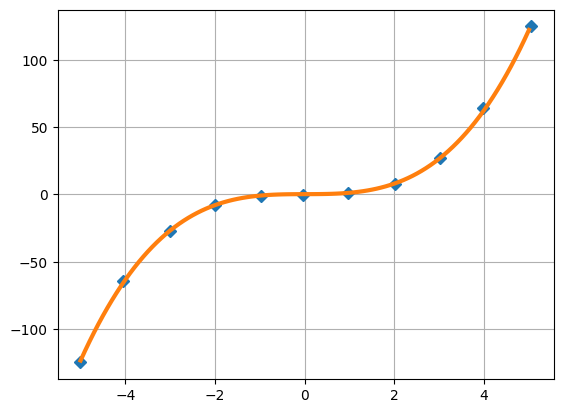

In [96]:
delta = 1.0
x = linspace(-5,5,11)
y = x**3+delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)
m = vstack((x**3, x**2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]
x_prec = linspace(-5,5,101)
plt.plot(x,y,'D')
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3],'-', lw = 3)
plt.grid()